<a href="https://colab.research.google.com/github/anacasicande/Modelamiento/blob/main/PDE_Ana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

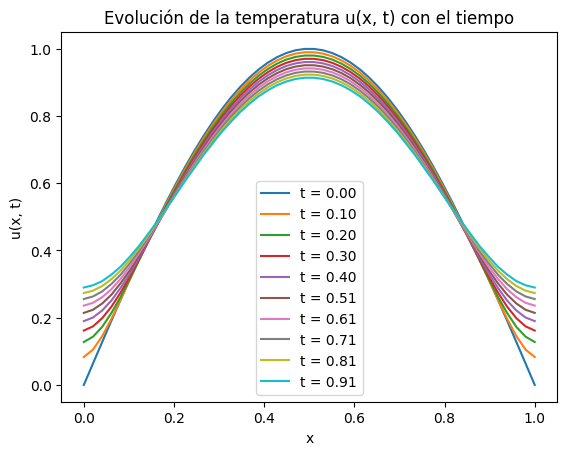

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parámetros
L = 1          # longitud del dominio
alpha = 0.01   # coeficiente de difusividad térmica
Nx = 50        # número de puntos en el espacio
Nt = 100       # número de puntos en el tiempo
dx = L / (Nx - 1)  # espacio entre puntos en la dirección x
x = np.linspace(0, L, Nx)  # arreglo de puntos x
t = np.linspace(0, 1, Nt)  # arreglo de puntos t

# Condiciones iniciales
u0 = np.sin(np.pi * x)  # u(x, 0) = sin(pi*x/L), ejemplo inicial

def heat_equation(t, u):
    dudt = np.zeros_like(u)
    # Condiciones de Neumann en los bordes
    dudt[0] = alpha * (u[1] - u[0]) / dx**2  # frontera izquierda
    dudt[-1] = alpha * (u[-2] - u[-1]) / dx**2  # frontera derecha
    # Ecuación de calor en el interior del dominio
    dudt[1:-1] = alpha * (u[:-2] - 2*u[1:-1] + u[2:]) / dx**2
    return dudt

# Resolver la EDP
sol = solve_ivp(heat_equation, [t[0], t[-1]], u0, t_eval=t, method='RK45')

# Gráfica de la solución
for i in range(0, Nt, 10):  # Graficar cada 10 pasos de tiempo
    plt.plot(x, sol.y[:, i], label=f't = {t[i]:.2f}')

plt.title('Evolución de la temperatura u(x, t) con el tiempo')
plt.xlabel('x')
plt.ylabel('u(x, t)')
plt.legend()
plt.show()
